# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
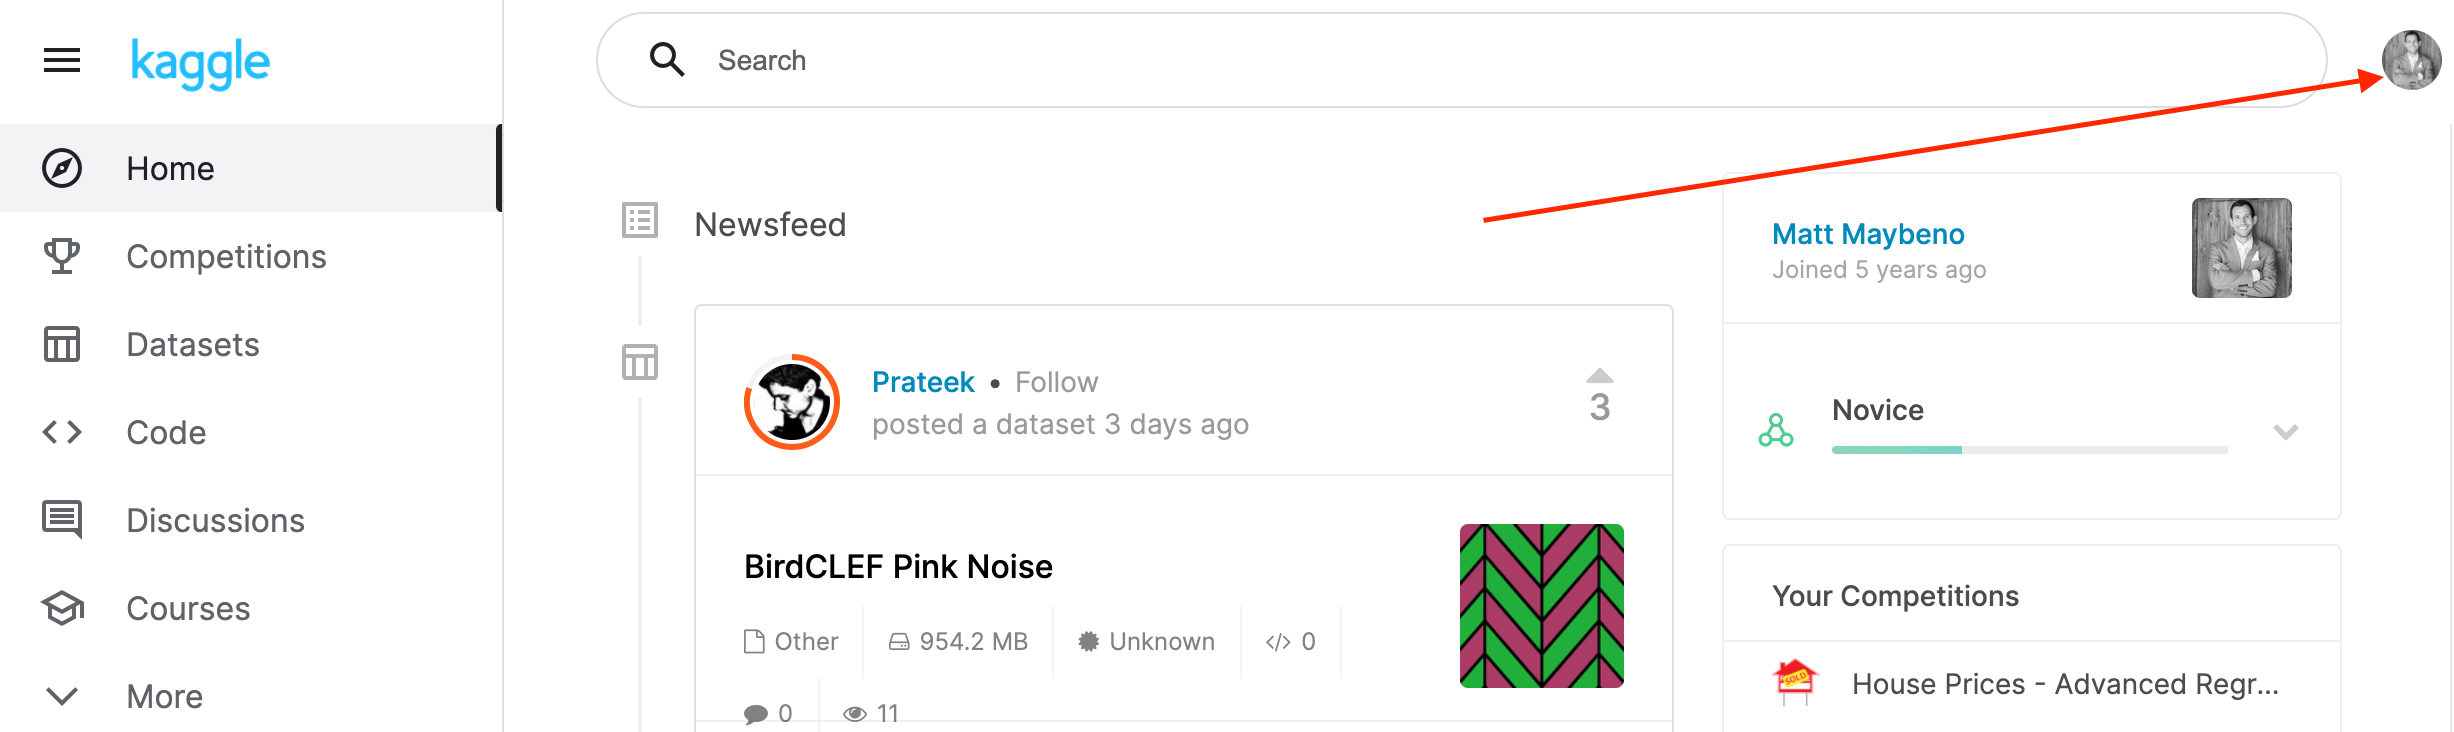
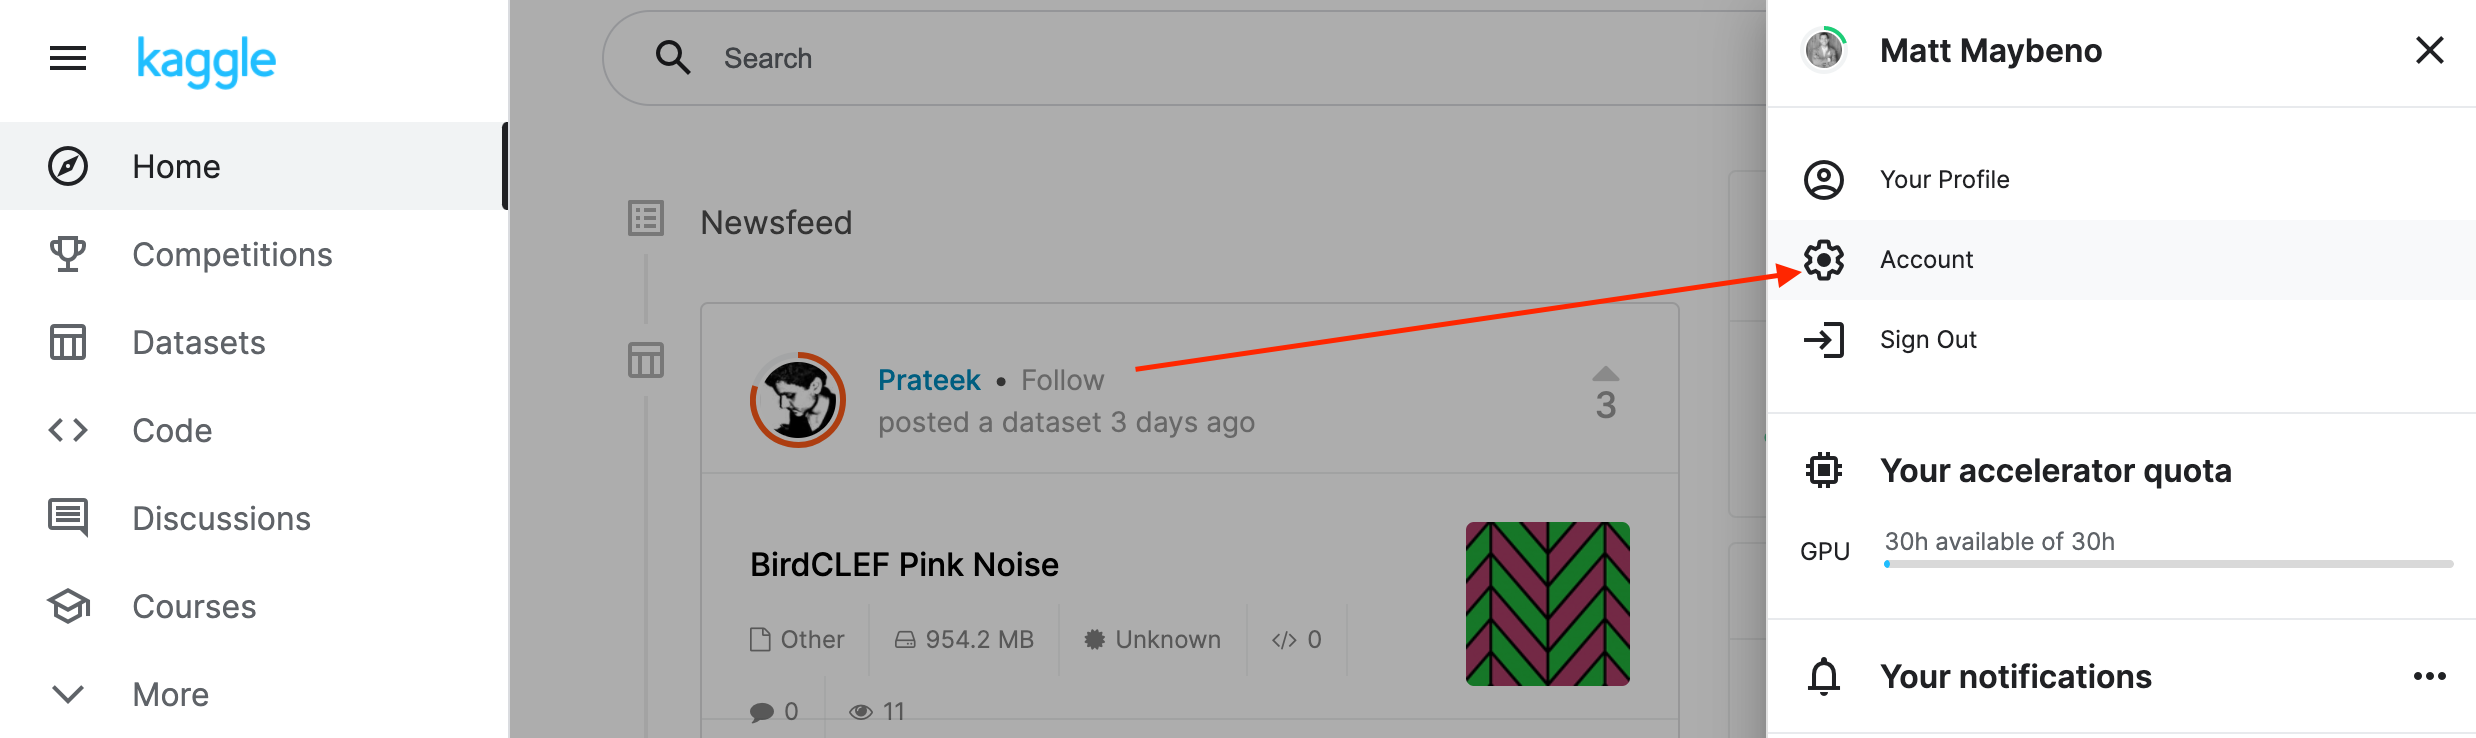
2. Scroll down to API and click Create New API Token.
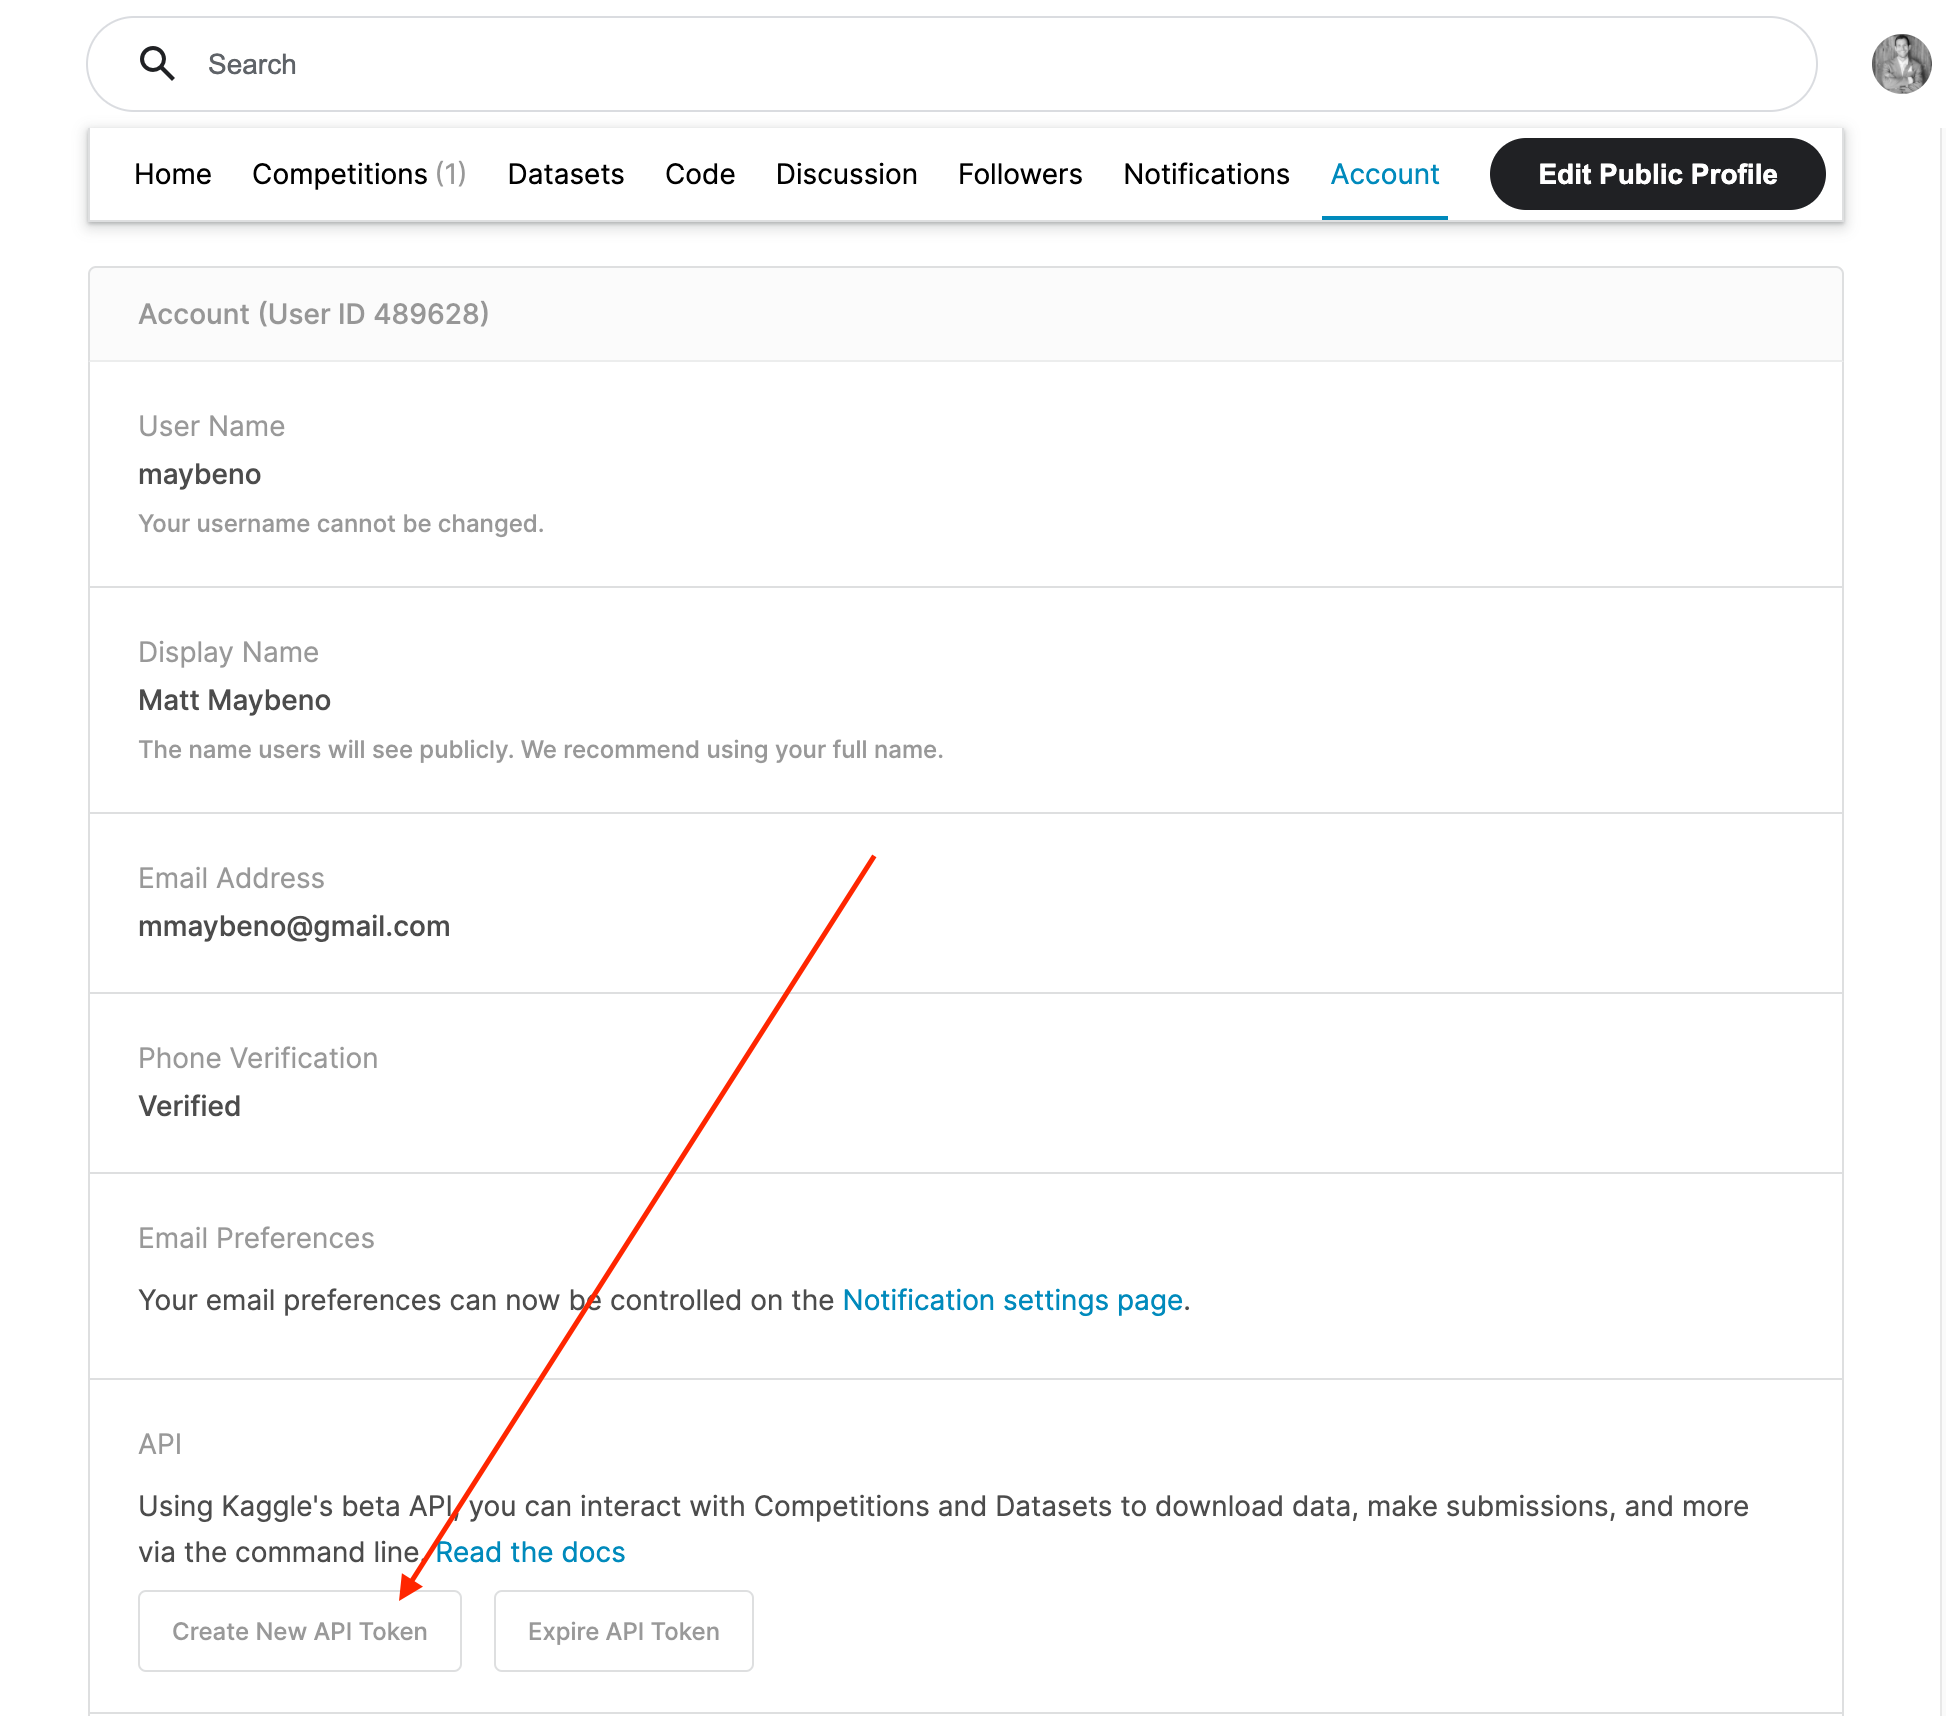
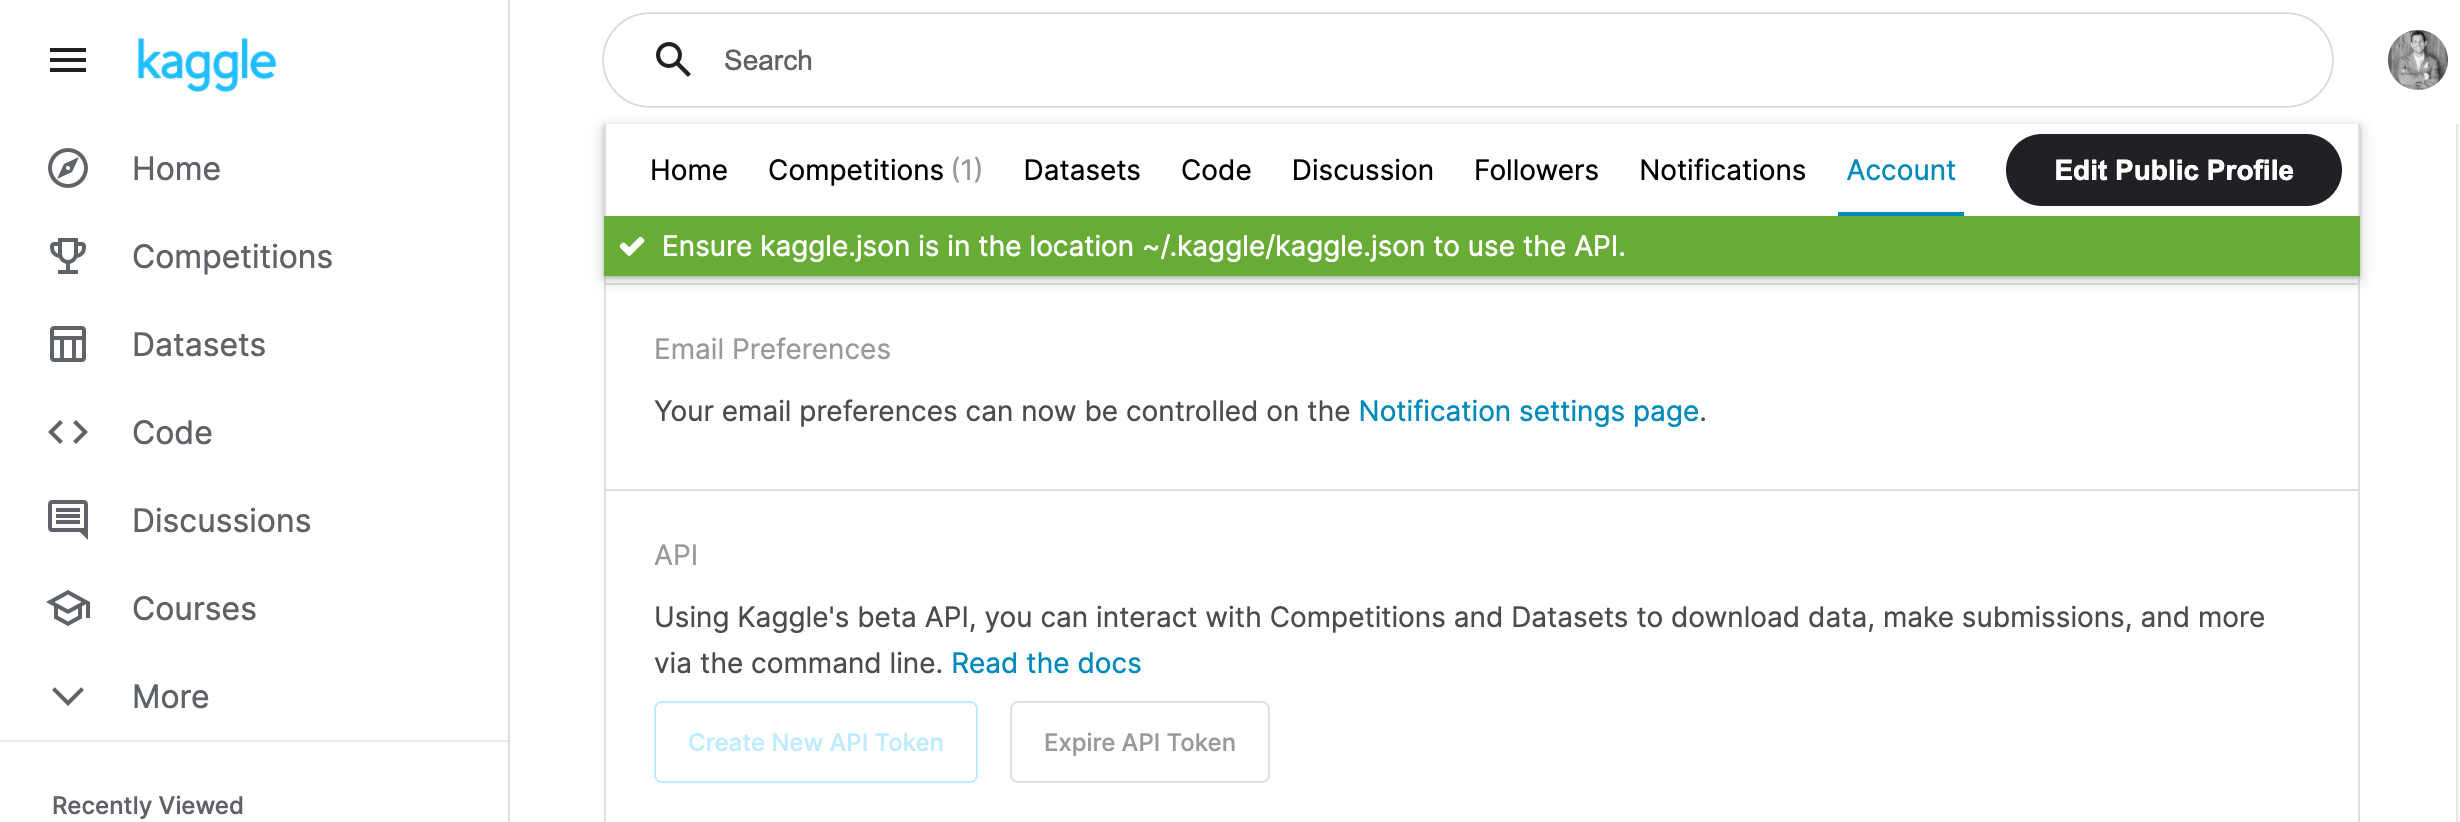
3. Open up `kaggle.json` and use the username and key.
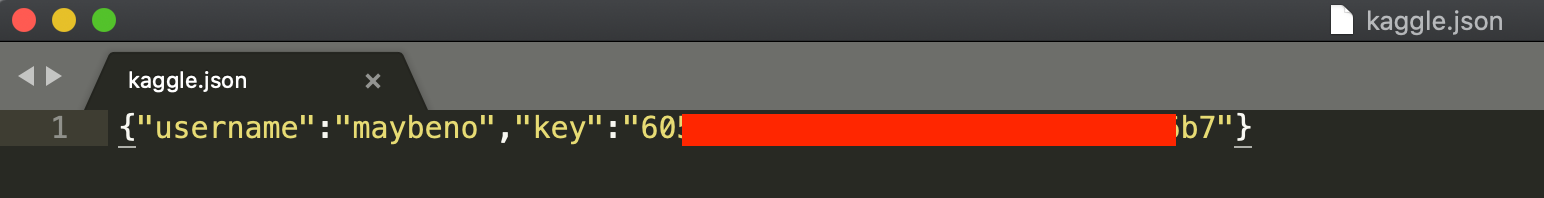

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.2 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 85.8 MB/s eta 0:00:00:00:010:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.7 MB/s eta 0:00:00:00:0100:01
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=ce5d859866c5f8ac32dfa7377071e6ce9e0227590e15e0b6db6a74df439f9969
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 58.0 MB/s eta 0:00:00
  Installing b

### Setup Kaggle API Key

In [25]:
# create the .kaggle directory and an empty kaggle.json file
!pip install -q Kaggle

# create a kaggle directory
#!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [27]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root’: Permission denied
touch: cannot touch '/root/.kaggle/kaggle.json': Permission denied
chmod: cannot access '/root/.kaggle/kaggle.json': Permission denied


In [26]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "gurugubellianil"
kaggle_key = "168bff5465eea0f1eb66bebe761b4dec"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

PermissionError: [Errno 13] Permission denied: '/root/.kaggle/kaggle.json'

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
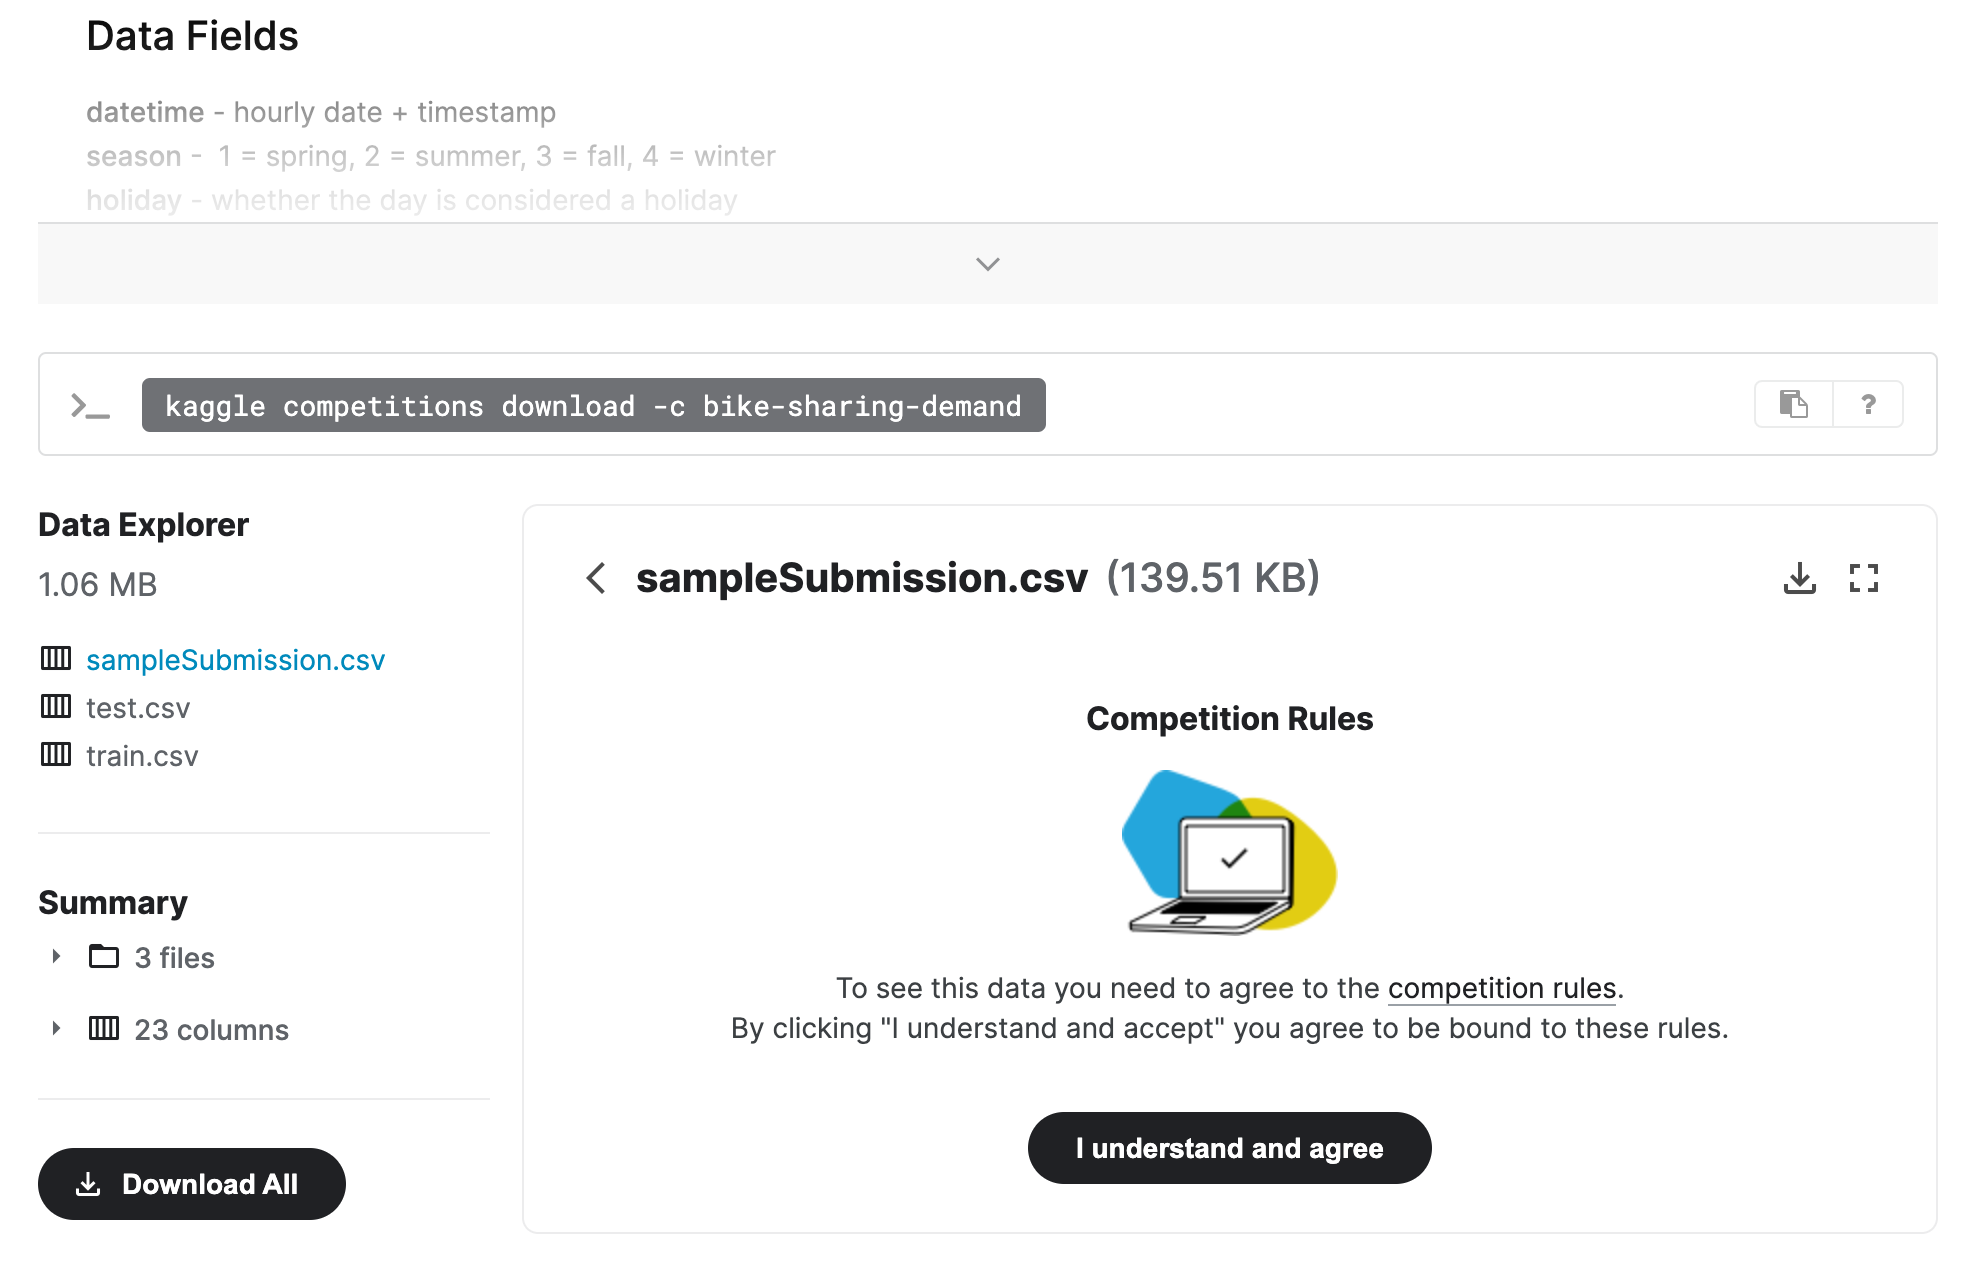

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 54.4MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [3]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',parse_dates=["datetime"])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000   
50%        1.000000      1.000000     20.50000     24.240000     62.000000   
75%        1.000000      2.000000     26.24000     31.060000     77.000000   
max        1.000000      4.000000     41.00000     45.455000    100.000000   
std        0.466159      0.633839      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

In [6]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv',parse_dates=["datetime"])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [7]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv',parse_dates=["datetime"])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
ignored_columns = ["casual", "registered"]

In [13]:
predictor = TabularPredictor(
    label='count',
    problem_type="regression",
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_152258"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240430_152258"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.78 GB / 5.36 GB (70.5%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (-root_mean_squared_error)
	57.25s	 = Training   runtime
	9.6s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 325.45s of the 525.49s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (-root_mean_squared_error)
	17.01s	 = Training   runtime
	1.39s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 304.91s of the 504.95s of remaining time.
	-116.5484	 = Validation score   (-root_mean_squared_error)
	16.17s	 = Training   runtime
	0.85s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 287.19s of the 487.23s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4125.
	Ran out of time, early stopping on iteration 4255.
	Ran out of time, early stopping on iteration 4104.
	Ran out of time, early stopping on iteration 4438.
	Ran out of time, early stopping on iteration 4498.
	-130.5806	 = Validation score   (-root_mean_squared_error)
	237.03s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 49.96s of the 250.

[1000]	valid_set's rmse: 60.6212
[2000]	valid_set's rmse: 60.0139
[1000]	valid_set's rmse: 60.8505
[2000]	valid_set's rmse: 59.7802
[1000]	valid_set's rmse: 63.5014
[2000]	valid_set's rmse: 62.3981
[1000]	valid_set's rmse: 64.3139
[2000]	valid_set's rmse: 62.4806
[1000]	valid_set's rmse: 58.8796
[2000]	valid_set's rmse: 57.875
[1000]	valid_set's rmse: 63.3716
[2000]	valid_set's rmse: 62.1822
[1000]	valid_set's rmse: 63.2193
[2000]	valid_set's rmse: 62.0194
[1000]	valid_set's rmse: 58.3153


	-60.5181	 = Validation score   (-root_mean_squared_error)
	47.83s	 = Training   runtime
	3.84s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 144.37s of the 144.35s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.1358	 = Validation score   (-root_mean_squared_error)
	13.84s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 129.97s of the 129.96s of remaining time.
	-53.32	 = Validation score   (-root_mean_squared_error)
	40.99s	 = Training   runtime
	1.11s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 87.2s of the 87.19s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1212.
	Ran out of time, early stopping on iteration 1311.
	Ran out of time, early stopping on iteration 1429.
	Ran o

### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.769599      15.322824  524.710763                0.000698           0.364609            3       True         15
1   RandomForestMSE_BAG_L2  -53.320041      14.154553  415.166024                1.110522          40.986593            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.790163      13.933192  389.483496                0.889161          15.304065            2       True         14
3          LightGBM_BAG_L2  -55.135772      13.270000  388.016868                0.225970          13.837437            2       True         11
4          CatBoost_BAG_L2  -55.255559      13.096474  454.218059                0.052443          80.038627            2       True         13
5        LightGBMXT_BAG_L2  -60.518056      16.884971  422.006862         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [16]:
predictions = predictor.predict(test)
predictions = {'datetime': test['datetime'], 'Pred_count': predictions}
predictions = pd.DataFrame(data=predictions)
predictions.head()

datetime  Pred_count
0 2011-01-20 00:00:00   23.629269
1 2011-01-20 01:00:00   41.970566
2 2011-01-20 02:00:00   46.314308
3 2011-01-20 03:00:00   49.542381
4 2011-01-20 04:00:00   52.041100

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

datetime   Pred_count
count                           6493  6493.000000
mean   2012-01-13 09:27:47.765285632   101.197556
min              2011-01-20 00:00:00     2.784252
25%              2011-07-22 15:00:00    20.890858
50%              2012-01-20 23:00:00    64.331596
75%              2012-07-20 17:00:00   169.635635
max              2012-12-31 23:00:00   362.269684
std                              NaN    90.369186

In [20]:
# How many negative values do we have?

def calNeg(val):
   return val[val < 0].sum()

NegV = predictions.groupby(predictions['Pred_count'])
re = NegV['Pred_count'].agg([('No.of Negative values', calNeg)])
print(re)

            No.of Negative values
Pred_count                       
2.784252                      0.0
2.816588                      0.0
2.818243                      0.0
2.928141                      0.0
3.029108                      0.0
...                           ...
361.349609                    0.0
361.419434                    0.0
361.767517                    0.0
361.864990                    0.0
362.269684                    0.0

[6270 rows x 1 columns]


In [ ]:
# Set them to zero
# Min = 0

### Set predictions to submission dataframe, save, and submit

In [21]:
submission["count"] = predictions['Pred_count']
submission.to_csv("submission.csv", index=False)

In [28]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 571kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-04-30 15:59:33  first raw submission  complete  1.79816      1.79816       


#### Initial score of 1.79816

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

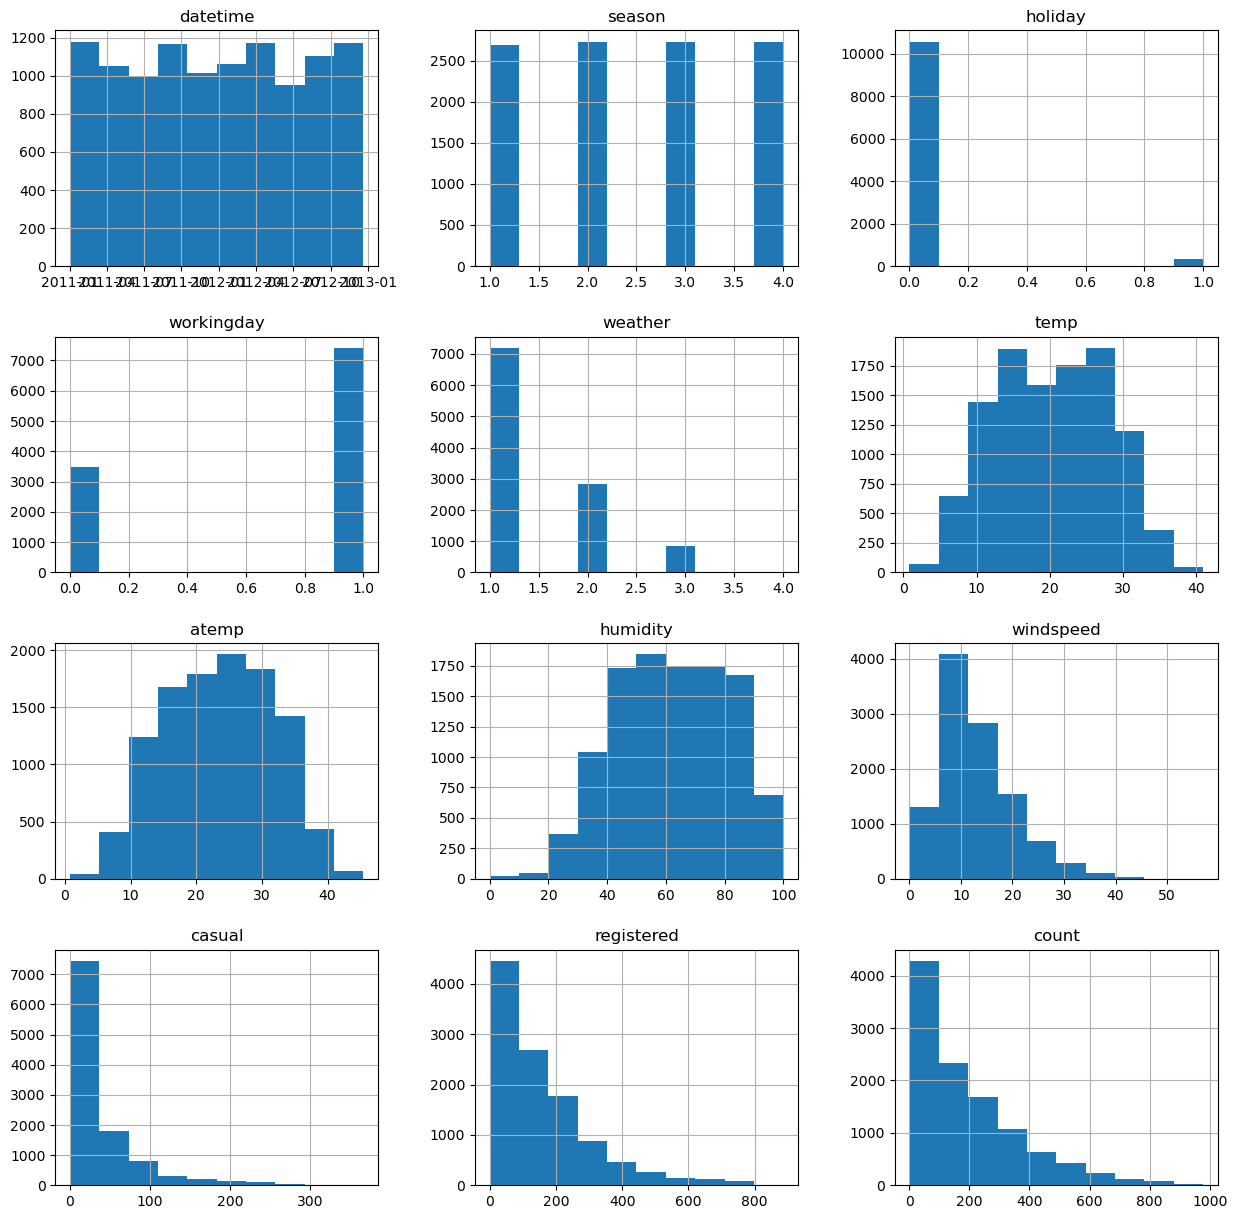

In [33]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

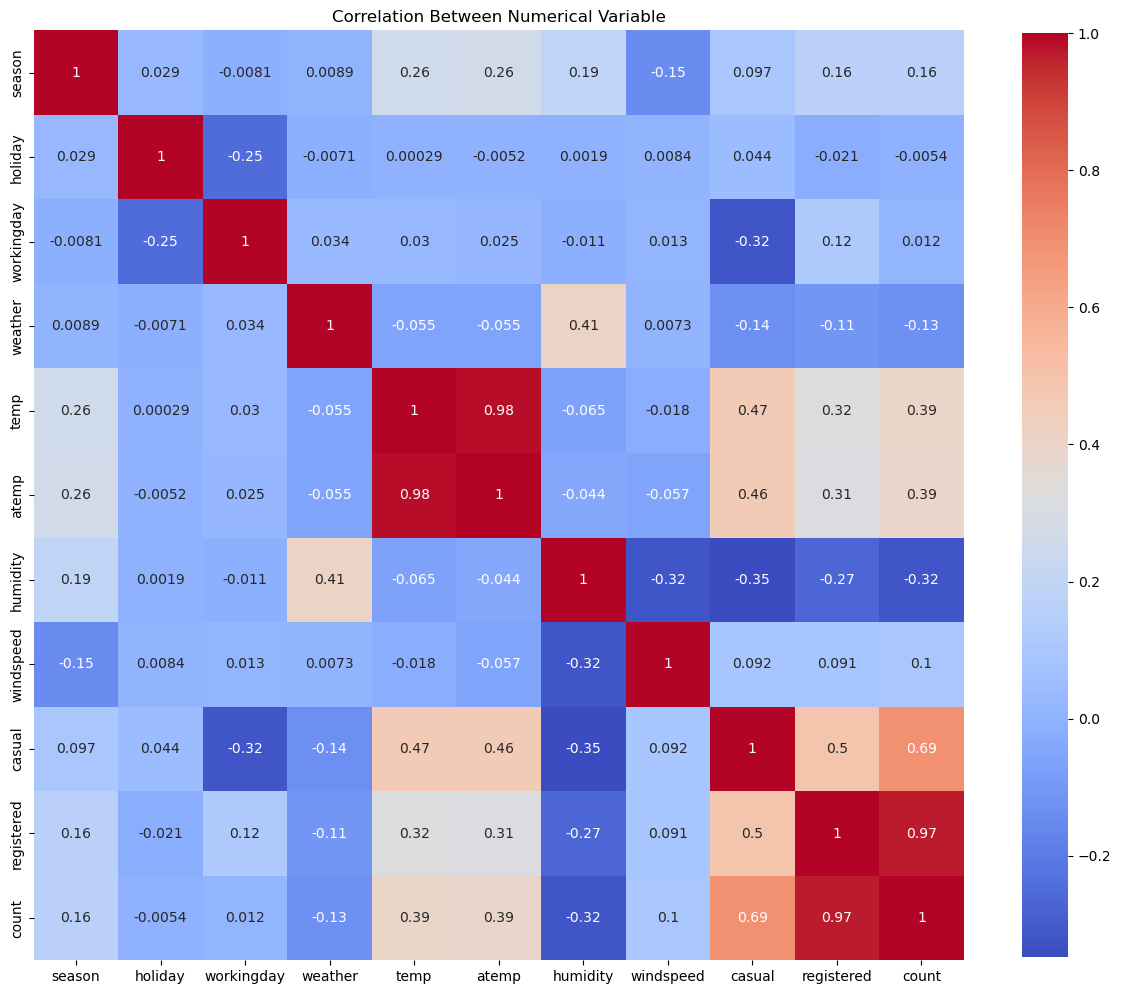

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
corrD = train.copy()
corr_map = corrD.drop(columns=['datetime']).corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_map, square = True, annot = True, cmap = 'coolwarm', ax = ax, cbar_kws = {'shrink': 0.8})
ax.set_title('Correlation Between Numerical Variable')

In [41]:
# create a new feature
# Train
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek
train["hour"] = train["datetime"].dt.hour
# Drop datetime
train.drop(["datetime"], axis=1, inplace=True)
train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    5     0  
1       8          32     40  2011      1    5     1  
2       5          27     32  2011      1    5     2  
3       3          10     13  2011      1    5     3  
4       0           1      1  2011      1    5     4

In [42]:
# Test
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek
test["hour"] = test["datetime"].dt.hour
# Drop datetime
test.drop(["datetime"], axis=1, inplace=True)
test.head()

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   year  month  day  hour  
0  2011      1    3     0  
1  2011      1    3     1  
2  2011      1    3     2  
3  2011      1    3     3  
4  2011      1    3     4

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [43]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [44]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int32   
 12  month       10886 non-null  int32   
 13  day         10886 non-null  int32   
 14  hour        10886 non-null  int32   
dtypes: category(2), float64(3), int32(4), int64(6)
memory usage: 957.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 colum

(None, None)

In [46]:
# View are new feature
train.head(10)

season  holiday  workingday weather   temp   atemp  humidity  windspeed  \
0      1        0           0       1   9.84  14.395        81     0.0000   
1      1        0           0       1   9.02  13.635        80     0.0000   
2      1        0           0       1   9.02  13.635        80     0.0000   
3      1        0           0       1   9.84  14.395        75     0.0000   
4      1        0           0       1   9.84  14.395        75     0.0000   
5      1        0           0       2   9.84  12.880        75     6.0032   
6      1        0           0       1   9.02  13.635        80     0.0000   
7      1        0           0       1   8.20  12.880        86     0.0000   
8      1        0           0       1   9.84  14.395        75     0.0000   
9      1        0           0       1  13.12  17.425        76     0.0000   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    5     0  
1       8          32     40  2011      1    5     1  
2       5          27     32  2011      1    5     2  
3       3          10     13  2011      1    5     3  
4       0           1      1  2011      1    5     4  
5       0           1      1  2011      1    5     5  
6       2           0      2  2011      1    5     6  
7       1           2      3  2011      1    5     7  
8       1           7      8  2011      1    5     8  
9       8           6     14  2011      1    5     9

array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

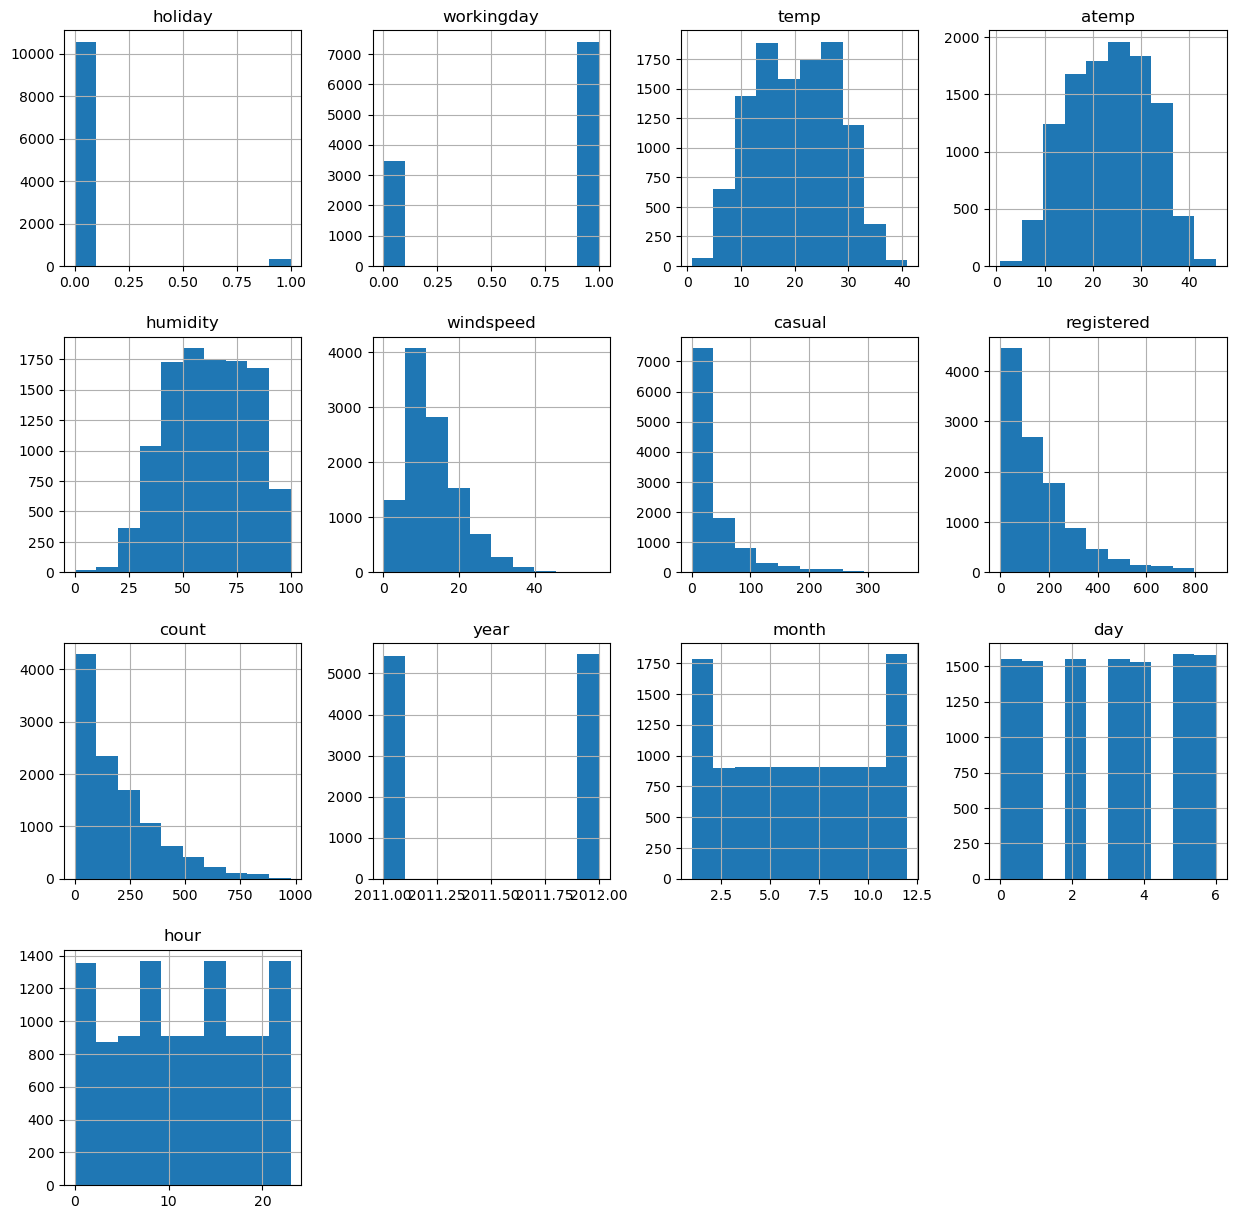

In [47]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [49]:
ignored_columns = ["casual", "registered"]

In [52]:
predictor_new_features = TabularPredictor(
    label='count',
    problem_type="regression",
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_170549"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240430_170549"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   1.10 GB / 5.36 GB (20.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

[1000]	valid_set's rmse: 37.3955
[2000]	valid_set's rmse: 35.8564
[3000]	valid_set's rmse: 35.7733
[4000]	valid_set's rmse: 35.749
[1000]	valid_set's rmse: 38.4092
[2000]	valid_set's rmse: 36.984
[3000]	valid_set's rmse: 36.7048
[4000]	valid_set's rmse: 36.6577
[5000]	valid_set's rmse: 36.6682
[6000]	valid_set's rmse: 36.6427
[1000]	valid_set's rmse: 36.9097
[2000]	valid_set's rmse: 35.5912
[3000]	valid_set's rmse: 35.1505
[4000]	valid_set's rmse: 34.9993
[5000]	valid_set's rmse: 34.869
[6000]	valid_set's rmse: 34.8566
[7000]	valid_set's rmse: 34.8204
[8000]	valid_set's rmse: 34.7883
[9000]	valid_set's rmse: 34.7902
[10000]	valid_set's rmse: 34.8132
[1000]	valid_set's rmse: 38.5003
[2000]	valid_set's rmse: 37.0041
[3000]	valid_set's rmse: 36.7718
[4000]	valid_set's rmse: 36.7333
[5000]	valid_set's rmse: 36.7654
[1000]	valid_set's rmse: 40.4421
[2000]	valid_set's rmse: 38.8755
[3000]	valid_set's rmse: 38.3805
[4000]	valid_set's rmse: 38.1652
[5000]	valid_set's rmse: 38.0954
[6000]	valid

	-36.4599	 = Validation score   (-root_mean_squared_error)
	71.66s	 = Training   runtime
	16.28s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 302.02s of the 502.07s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 35.0742
[1000]	valid_set's rmse: 34.1338
[2000]	valid_set's rmse: 33.9294
[1000]	valid_set's rmse: 34.257
[2000]	valid_set's rmse: 33.6373
[3000]	valid_set's rmse: 33.4395
[4000]	valid_set's rmse: 33.4325
[1000]	valid_set's rmse: 37.3575
[2000]	valid_set's rmse: 37.1945
[1000]	valid_set's rmse: 38.1734
[2000]	valid_set's rmse: 37.9207
[1000]	valid_set's rmse: 33.4459
[2000]	valid_set's rmse: 33.2585
[1000]	valid_set's rmse: 39.4999
[1000]	valid_set's rmse: 36.2444


	-35.7969	 = Validation score   (-root_mean_squared_error)
	26.46s	 = Training   runtime
	2.58s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 270.04s of the 470.1s of remaining time.
	-39.5874	 = Validation score   (-root_mean_squared_error)
	14.74s	 = Training   runtime
	0.81s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 253.82s of the 453.87s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2452.
	Ran out of time, early stopping on iteration 2468.
	Ran out of time, early stopping on iteration 2245.
	Ran out of time, early stopping on iteration 2377.
	Ran out of time, early stopping on iteration 2600.
	Ran out of time, early stopping on iteration 2861.
	Ran out of time, early stopping on iteration 2996.
	Ran out of time, early stopping on iteration 3485.
	-35.9177	 = Validation score   (-root_mean_square

In [53]:
predictor_new_features.fit_summary()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          CatBoost_BAG_L2  -34.079822      21.064626  430.813160                0.101764          66.727743            2       True         12
1      WeightedEnsemble_L2  -34.169171      20.610098  364.572216                0.000864           0.543764            2       True          8
2          LightGBM_BAG_L2  -34.514217      21.076707  376.275759                0.113845          12.190342            2       True         10
3   RandomForestMSE_BAG_L2  -34.846687      21.670112  400.217350                0.707250          36.131933            2       True         11
4        LightGBMXT_BAG_L2  -35.093569      21.283567  377.887459           

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.45988391821316,
  'LightGBM_BAG_L1': -35.79686905713535,
  'RandomForestMSE_BAG_L1': -39.587440921643605,
  'CatBoost_BAG_L1': -35.91771266520655,
  'ExtraTreesMSE_BAG_L1': -39.03339387756181,
  'WeightedEnsem

In [55]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = pd.DataFrame(data=predictions_new_features)
predictions_new_features.head()

count
0  15.498962
1   4.865256
2   2.895961
3   1.939850
4   1.702485

In [56]:
predictions_new_features.describe()

count
count  6493.000000
mean    190.180817
std     173.996292
min     -22.247910
25%      44.992821
50%     149.837234
75%     282.708466
max     929.507874

In [59]:
# How many negative values do we have?

def calNeg(val):
   return val[val < 0].sum()

NegV = predictions_new_features.groupby(predictions_new_features['count'])
re = NegV['count'].agg([('No.of Negative values', calNeg)])
print(re)

             No.of Negative values
count                             
-22.247910              -22.247910
-18.666628              -18.666628
-16.526678              -16.526678
-15.943519              -15.943519
-12.128393              -12.128393
...                            ...
 892.017151               0.000000
 895.673157               0.000000
 901.416870               0.000000
 916.850342               0.000000
 929.507874               0.000000

[6491 rows x 1 columns]


In [60]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features['count']<0] = 0

In [61]:
predictions_new_features.describe()

count
count  6493.000000
mean    190.236237
std     173.934402
min       0.000000
25%      44.992821
50%     149.837234
75%     282.708466
max     929.507874

In [63]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv',parse_dates=["datetime"])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 709kB/s]
Successfully submitted to Bike Sharing Demand

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-30 17:27:07  new features          complete  0.53553      0.53553       
submission.csv               2024-04-30 15:59:33  first raw submission  complete  1.79816      1.79816       


#### New Score of 0.54

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [72]:
import autogluon.core as ag

## From autogluon documentation
nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
              # activation function used in NN
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }

num_trials = 20
search_strategy = 'auto'
scheduler = 'local'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

In [73]:
ignored_columns = ["casual", "registered"]

In [75]:
predictor_new_hpo = TabularPredictor(
    label='count',
    problem_type="regression",
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=600,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_175507"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240430_175507"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   4.07 GB / 5.36 GB (76.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's rmse: 178.251
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[18]	valid_set's rmse: 146.682
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's rmse: 183.4

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 35.0742
[1000]	valid_set's rmse: 34.1338
[2000]	valid_set's rmse: 33.9294
[1000]	valid_set's rmse: 34.257
[2000]	valid_set's rmse: 33.6373
[3000]	valid_set's rmse: 33.4395
[4000]	valid_set's rmse: 33.4325
[1000]	valid_set's rmse: 37.3575
[2000]	valid_set's rmse: 37.1945
[1000]	valid_set's rmse: 38.1734
[2000]	valid_set's rmse: 37.9207
[1000]	valid_set's rmse: 33.4459
[2000]	valid_set's rmse: 33.2585
[1000]	valid_set's rmse: 39.4999
[1000]	valid_set's rmse: 36.2444


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 33.7234
[1000]	valid_set's rmse: 35.5645


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 35.5817
[1000]	valid_set's rmse: 34.1995
[1000]	valid_set's rmse: 35.3549


	Ran out of time, early stopping on iteration 2110. Best iteration is:
	[2092]	valid_set's rmse: 35.0052


[2000]	valid_set's rmse: 35.0222
[1000]	valid_set's rmse: 37.4727


	Ran out of time, early stopping on iteration 1431. Best iteration is:
	[1201]	valid_set's rmse: 37.3856
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-35.7969	 = Validation score   (-root_mean_squared_error)
	31.59s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-35.1776	 = Validation score   (-root_mean_squared_error)
	21.49s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 89.96s of the 445.29s of remaining time.
Will use custom hpo logic because ray import failed. Reason: ray is required to train folds in parallel for TabularPredictor or HPO for MultiModalPredictor. A quick tip is to install via `pip install ray==2.6.3`


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 3)
	Ran out of time, stopping training early. (Stopping on epoch 3)
	Ran out of time, stopping training early. (Stopping on epoch 4)
	Ran out of time, stopping training early. (Stopping on epoch 3)
	Ran out of time, stopping training early. (Stopping on epoch 3)
	Ran out of time, stopping training early. (Stopping on epoch 4)
	Ran out of time, stopping training early. (Stopping on epoch 3)
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L1/T1 ...
	-111.1891	 = Validation score   (-root_mean_squared_error)
	19.72s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: Ne

[1000]	valid_set's rmse: 33.2738
[1000]	valid_set's rmse: 36.4176
[1000]	valid_set's rmse: 37.0866
[1000]	valid_set's rmse: 32.9432


	-35.4416	 = Validation score   (-root_mean_squared_error)
	31.02s	 = Training   runtime
	2.08s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 324.0s of remaining time.
	-34.3448	 = Validation score   (-root_mean_squared_error)
	0.48s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 4 L2 models ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 72.79s of the 323.49s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 290. Best iteration is:
	[60]	valid_set's rmse: 39.0607
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-36.0951	 = Validation score   (-root_mean_squared_error)
	9.67s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T2 ...
	-35.6461	 = Validation score   (-root_mean_squared_error)
	18.96s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T3 ...
	-35.4969	 = Validation score   (-root_mean_squared_error)
	18.13s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T4 ...
	

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 295. Best iteration is:
	[75]	valid_set's rmse: 37.936
	Ran out of time, early stopping on iteration 321. Best iteration is:
	[98]	valid_set's rmse: 37.4381
	Ran out of time, early stopping on iteration 384. Best iteration is:
	[87]	valid_set's rmse: 33.1618
	Ran out of time, early stopping on iteration 355. Best iteration is:
	[89]	valid_set's rmse: 31.8261
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-34.9601	 = Validation score   (-root_mean_squared_error)
	19.79s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-35.4512	 = Validation score   (-root_mean_squared_error)
	24.0s	 = Training   runtime
	0.0s	 = Va

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 4)
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L2/T1 ...
	-36.2868	 = Validation score   (-root_mean_squared_error)
	22.33s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/T2 ...
	-36.7437	 = Validation score   (-root_mean_squared_error)
	38.4s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 72.79s of the 134.8s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-35.5206	 = Validation score   (-root_mean_squared_error)
	40.75s	 = Training   runtime
	0.32s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training 

In [76]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2  -34.344766       2.081915   98.439366                0.000724           0.477755            2       True         15
1         WeightedEnsemble_L3  -34.610302       2.408792  436.919913                0.001114           0.355953            3       True         26
2          LightGBM_BAG_L2/T1  -34.960069       2.083022  271.871469                0.000114          19.786374            2       True         20
3          LightGBM_BAG_L2/T3  -35.119824       2.083172  273.168454                0.000264          21.083359            2       True         22
4          LightGBM_BAG_L1/T2  -35.177633       0.000208   21.494668                0.000208          21.494668            1       True         10
5        LightGBMLarge_BAG_L1  -35.441558       2.080333

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T3': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightG

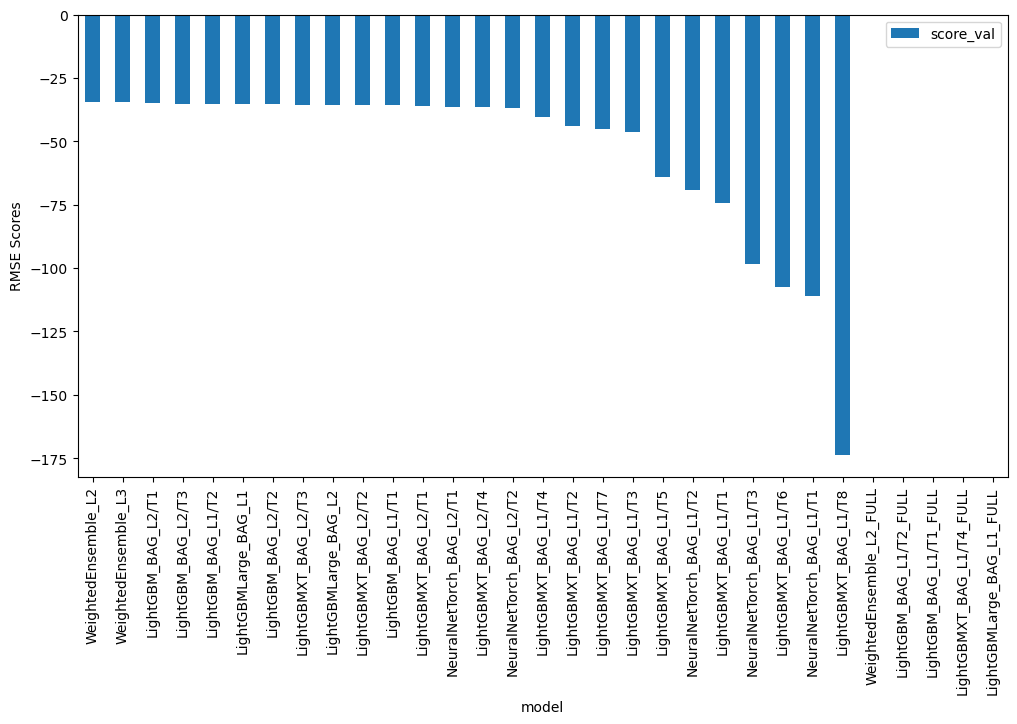

In [77]:
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [78]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    17.825603
1     4.653209
2     2.432260
3     2.359294
4     1.918092
Name: count, dtype: float32

In [79]:
predictions_new_hpo.describe()

count    6493.000000
mean      190.154205
std       174.060486
min       -16.014023
25%        45.448490
50%       148.374146
75%       283.098511
max       924.390259
Name: count, dtype: float64

In [86]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0

In [87]:
predictions_new_hpo.describe()

count    6493.000000
mean      190.181229
std       174.030411
min         0.000000
25%        45.448490
50%       148.374146
75%       283.098511
max       924.390259
Name: count, dtype: float64

In [88]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [89]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 701kB/s]
Successfully submitted to Bike Sharing Demand

In [90]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-30 18:14:06  new features with hyperparameters  complete  0.51062      0.51062       
submission_new_features.csv  2024-04-30 17:27:07  new features                       complete  0.53553      0.53553       
submission.csv               2024-04-30 15:59:33  first raw submission               complete  1.79816      1.79816       


#### New Score of 0.51

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

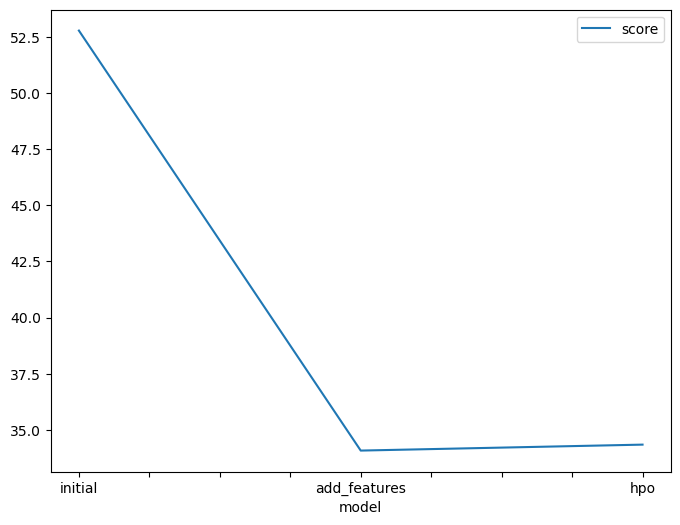

In [91]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [52.769, 34.079, 34.344]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

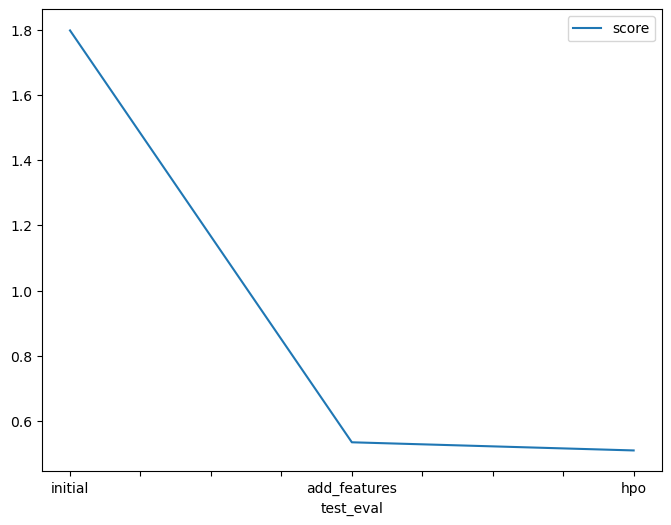

In [92]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.798, 0.535, 0.510]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [93]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.798, 0.535, 0.510]
})

model                                    hpo1  \
0                    initial                       prescribed_values   
1               add_features                       prescribed_values   
2  hpo (top-hpo-model: hpo2)  Tree-Based Models: (GBM, XT, XGB & RF)   

                hpo2                                       hpo3  score  
0  prescribed_values  presets: 'high quality' (auto_stack=True)  1.798  
1  prescribed_values  presets: 'high quality' (auto_stack=True)  0.535  
2                KNN          presets: 'optimize_for_deployment  0.510

In [96]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

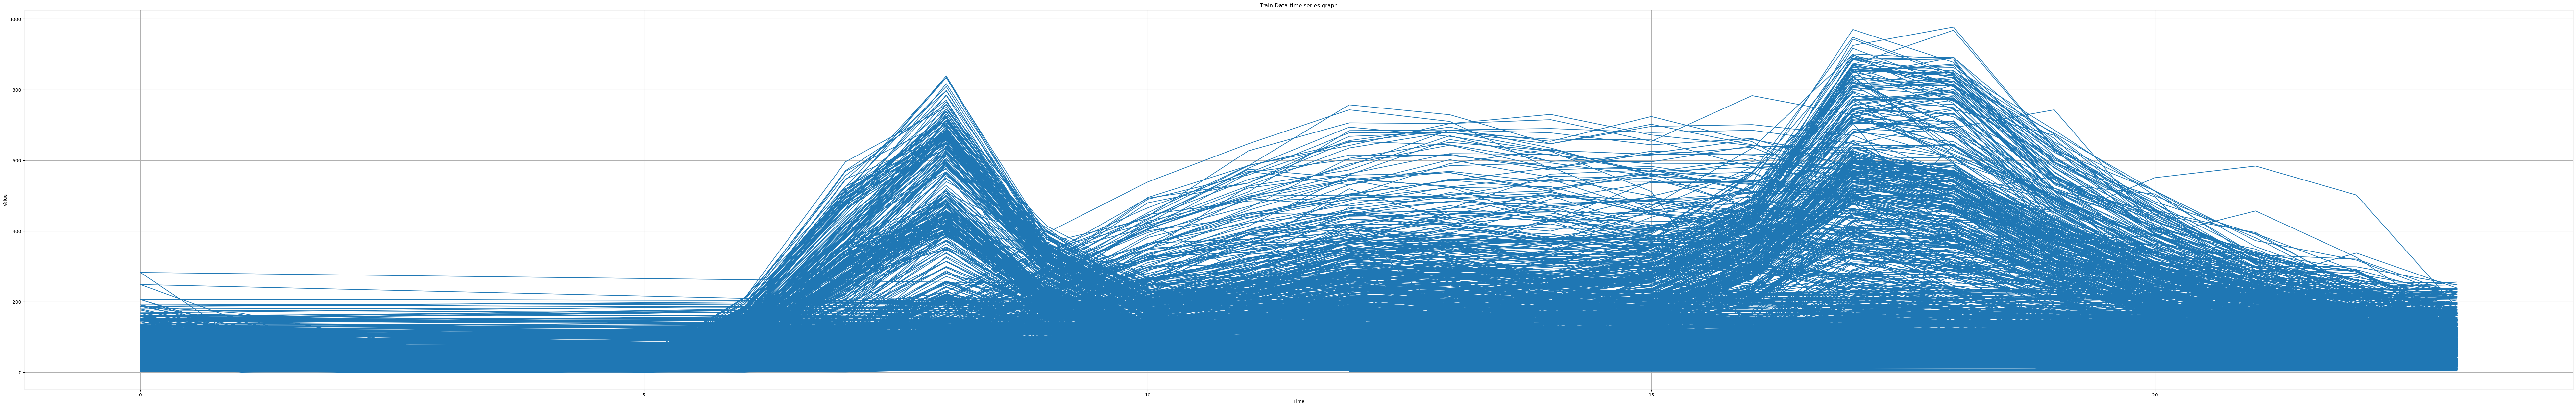

In [107]:
import matplotlib.pyplot as plt
series = train["count"].to_numpy()
time = train["hour"].to_numpy()
plt.figure(figsize=(100, 15))
plot_series(time, series)
plt.title("Train Data time series graph")
#plot_series(time1, series1)
plt.show()

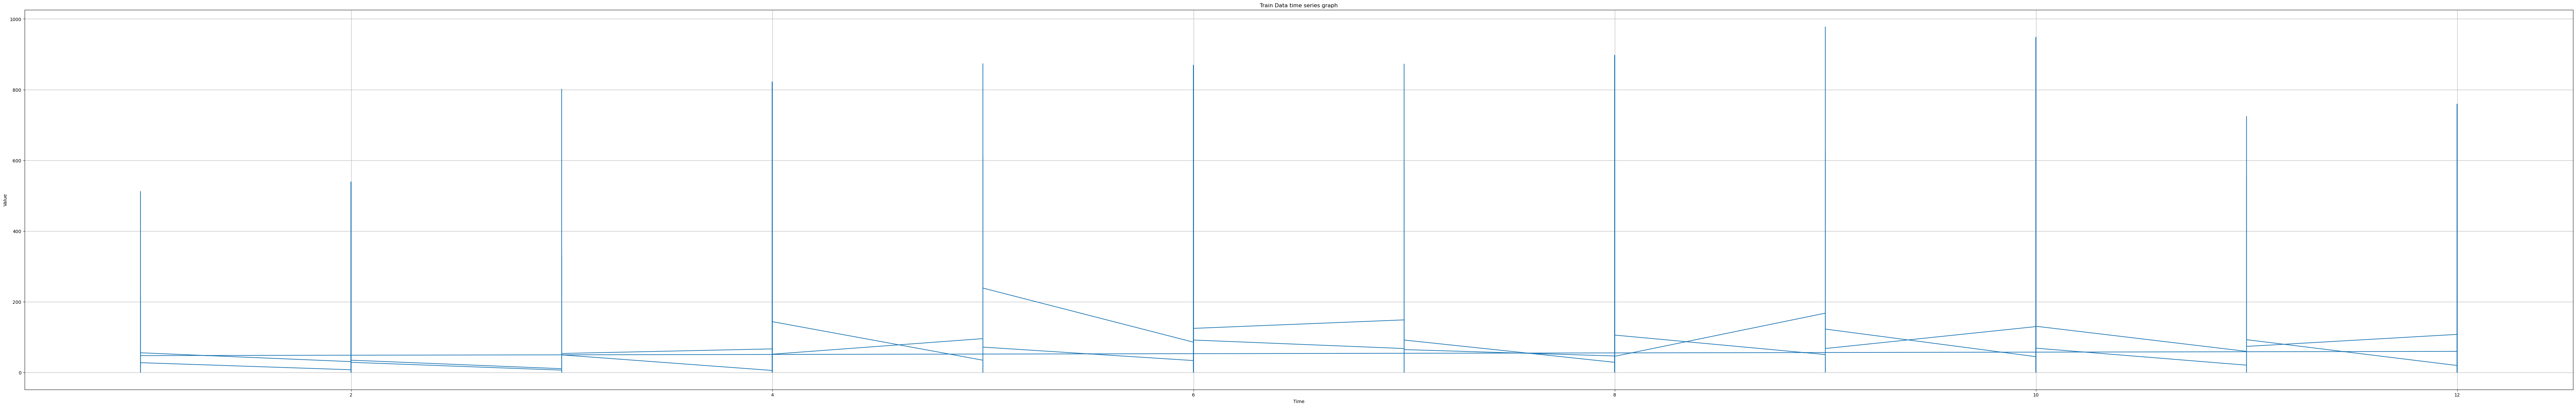

In [108]:
import matplotlib.pyplot as plt
series = train["count"].to_numpy()
time = train["month"].to_numpy()
plt.figure(figsize=(100, 15))
plot_series(time, series)
plt.title("Train Data time series graph")
#plot_series(time1, series1)
plt.show()

In [110]:
sub_new = pd.read_csv('submission_new_hpo.csv')

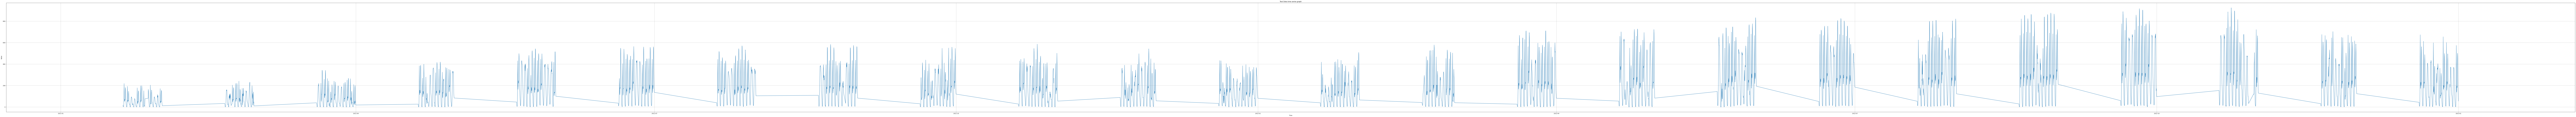

In [102]:
sub_new.loc[:, "datetime"] = pd.to_datetime(sub_new.loc[:, "datetime"])

series1 = sub_new["count"].to_numpy()
time1 = sub_new["datetime"].to_numpy()

plt.figure(figsize=(350, 15))
#plot_series(time, series)
plot_series(time1, series1)
plt.title("Test Data time series graph")
plt.show()

In [112]:
train.drop(['casual', 'registered', 'month', 'windspeed'], axis=1, inplace=True)
train.head()

season  holiday  workingday weather  temp   atemp  humidity  count  year  \
0      1        0           0       1  9.84  14.395        81     16  2011   
1      1        0           0       1  9.02  13.635        80     40  2011   
2      1        0           0       1  9.02  13.635        80     32  2011   
3      1        0           0       1  9.84  14.395        75     13  2011   
4      1        0           0       1  9.84  14.395        75      1  2011   

   day  hour  
0    5     0  
1    5     1  
2    5     2  
3    5     3  
4    5     4

In [129]:
test.drop(['month', 'windspeed'], axis=1, inplace=True)
test.head()

season  holiday  workingday weather   temp   atemp  humidity  year  day  \
0      1        0           1       1  10.66  11.365        56  2011    3   
1      1        0           1       1  10.66  13.635        56  2011    3   
2      1        0           1       1  10.66  13.635        56  2011    3   
3      1        0           1       1  10.66  12.880        56  2011    3   
4      1        0           1       1  10.66  12.880        56  2011    3   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4

In [ ]:
tr = train[~pd.isnull(train['count'])]
te = test[pd.isnull(test['count'])]

X_train = tr.drop(['count'], axis=1)
X_test = te.drop(['count'], axis=1)

y_train = tr['count']

In [124]:
from sklearn import metrics 
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1)) 
    
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output

In [125]:
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [126]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
randomforest = RandomForestRegressor()

rf_params = {'random_state': [42], 'n_estimators': [10, 20, 140]}
gridsearch_random_forest = GridSearchCV(estimator=randomforest, 
                                        param_grid=rf_params, 
                                        scoring=rmsle_scorer, 
                                        cv=5)

log_y = np.log(y_train)
gridsearch_random_forest.fit(X_train, log_y)
print(f'Best Parameter: {gridsearch_random_forest.best_params_}')

Best Parameter: {'n_estimators': 140, 'random_state': 42}


In [127]:
train_preds = gridsearch_random_forest.best_estimator_.predict(X_train)

print(f'RMSLE of random forest: {rmsle(log_y, train_preds, True):.4f}')

RMSLE of random forest: 0.1125
